# Diabetes Risk Prediction Project 

### Description: This notebook covers the data preprocessing, merging, and model training steps for a diabetes risk prediction model.


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Explore the datasets


In [2]:
#loading the dataset
dib = pd.read_csv('diabetes.csv')
dib.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
# dataset info
dib.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
# statistical info
dib.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## Preprocessing the datasets

In [5]:
dib.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [6]:
print(dib['Glucose'].value_counts()[0])
print(dib['BloodPressure'].value_counts()[0])
print(dib['SkinThickness'].value_counts()[0])
print(dib['Insulin'].value_counts()[0])
print(dib['BMI'].value_counts()[0])

5
35
227
374
11


###### Glucose, BloodPressure, SkinThickness, Insulin, and BMI has 0 which shows there is missing data because these features cant be 0


In [7]:
# List of columns where zero values are considered missing data
col_with_zero = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
# Looping through each column, replacing zeros with NaN, then fill NaNs with median
for cols in col_with_zero:
    dib[cols] = dib[cols].replace(0, np.NAN)
    dib[cols] = dib[cols].fillna(dib[cols].median())

In [8]:
dib.rename(columns={'Outcome':'Diabetes'}, inplace=True)

### Correlation Heatmap to check multicollinearity

<Axes: >

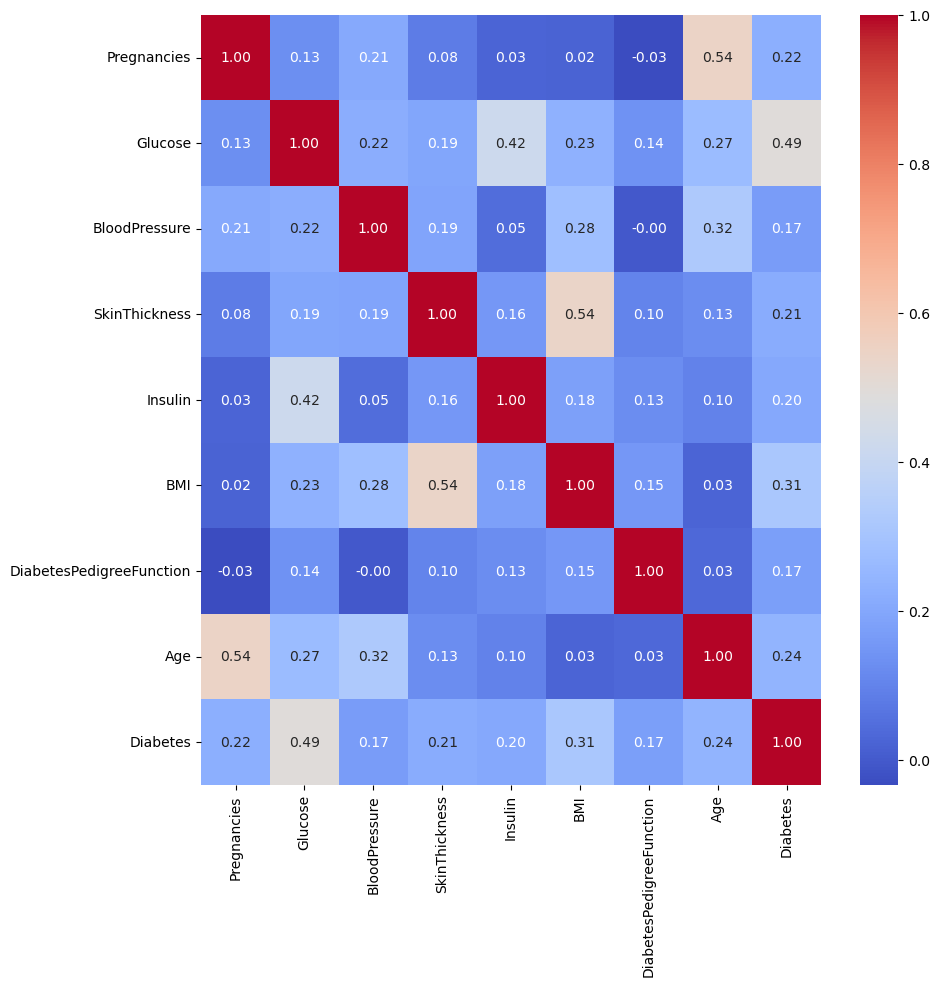

In [9]:
plt.figure(figsize=(10,10))
corr = dib.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')

In [11]:
# Splitting data into features (X) and target (y)
X = dib.drop(columns=['Diabetes'])
y = dib['Diabetes']

In [12]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
# defining a funciton to train test and evaluate the model
def train(model, X, y):
    # Splitting the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
    
    # Standardizing features to improve model performance
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    model.fit(X_train_scaled, y_train)
    
    pred = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, pred)
    cv_score = cross_val_score(model, X, y, cv=5, scoring='accuracy').mean()
    
    print("MODEL:", model)
    print("Accuracy score: ", accuracy)
    print("CV score: ", cv_score,"\n")
    print("classification report", classification_report(y_test, pred),"\n")

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# loading model into a var
models = [LogisticRegression(solver='liblinear', max_iter=500),
          RandomForestClassifier(n_estimators=200)]

# looping throught the var to train various models
for model in models:
    train(model, X, y)

MODEL: LogisticRegression(max_iter=500, solver='liblinear')
Accuracy score:  0.7760416666666666
CV score:  0.761768950004244 

classification report               precision    recall  f1-score   support

           0       0.79      0.88      0.83       123
           1       0.73      0.59      0.66        69

    accuracy                           0.78       192
   macro avg       0.76      0.74      0.74       192
weighted avg       0.77      0.78      0.77       192
 

MODEL: RandomForestClassifier(n_estimators=200)
Accuracy score:  0.8177083333333334
CV score:  0.7656735421441304 

classification report               precision    recall  f1-score   support

           0       0.84      0.89      0.86       123
           1       0.77      0.70      0.73        69

    accuracy                           0.82       192
   macro avg       0.81      0.79      0.80       192
weighted avg       0.82      0.82      0.82       192
 



In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
    
# Standardizing features to improve model performance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [15]:
from sklearn.model_selection import GridSearchCV
# Define parameter grid for Random Forest
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# Initializinh RandomForestClassifier
rf = RandomForestClassifier(random_state=1)

# Using GridSearchCV to search for the best hyperparameters
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid_rf, cv=5)
grid_search.fit(X_train_scaled, y_train)

print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation score: ", grid_search.best_score_)

Best parameters found:  {'max_depth': None, 'min_samples_split': 10, 'n_estimators': 200}
Best cross-validation score:  0.7622188905547227


In [16]:
# using the best estimator found by GridSearchCV
best_model = grid_search.best_estimator_
best_model.fit(X_train_scaled, y_train)

# Evaluating on the test set
test_accuracy = best_model.score(X_test_scaled, y_test)
print("Test Accuracy: ", test_accuracy)

Test Accuracy:  0.7760416666666666


In [17]:
import joblib 
#saving model
joblib.dump(best_model,'new_model.joblib')

['new_model.joblib']

In [18]:
# dumping the scaler cause the model cant predict unscaled very well
joblib.dump(scaler, 'new_scaler.joblib')

['new_scaler.joblib']

In [19]:
X_test.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
285,7,136.0,74.0,26.0,135.0,26.0,0.647,51
101,1,151.0,60.0,29.0,125.0,26.1,0.179,22
581,6,109.0,60.0,27.0,125.0,25.0,0.206,27
352,3,61.0,82.0,28.0,125.0,34.4,0.243,46
726,1,116.0,78.0,29.0,180.0,36.1,0.496,25


In [20]:
loaded_model = joblib.load('new_model.joblib')

In [21]:
X_new = {
    'Pregnancies': [1],
    'Glucose': [120],      
    'BloodPressure': [70],
    'SkinThickness': [20],
    'Insulin': [85],
    'BMI': [27.0],
    'DiabetesPedigreeFunction': [0.5],
    'Age': [35]
}
X_new_df = pd.DataFrame(X_new)
new = scaler.transform(X_new_df)
# Model prediction
predictions = loaded_model.predict(new)

# Output the predictions
print("Prediction: ", predictions)


Prediction:  [0]
